In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
path = "../result/CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_13cycle_pvalue.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [5]:
df['protein'] = df['peptide'].apply(peptide_type)

In [6]:
sample = df[df['protein']=='SAMPLE']
trap = df[df['protein']=='TRAP']
decoy = df[df['protein']=='DECOY_null']

In [7]:
sample_score = sample['LDA_Score'].values
trap_score = trap['LDA_Score'].values
decoy_score = decoy['LDA_Score'].values

In [8]:
path = "../result/CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv"

In [9]:
df = pd.read_csv(path)

In [10]:
threshold = np.min(df['LDA_Score'].values)

In [11]:
threshold

82.25190700456781

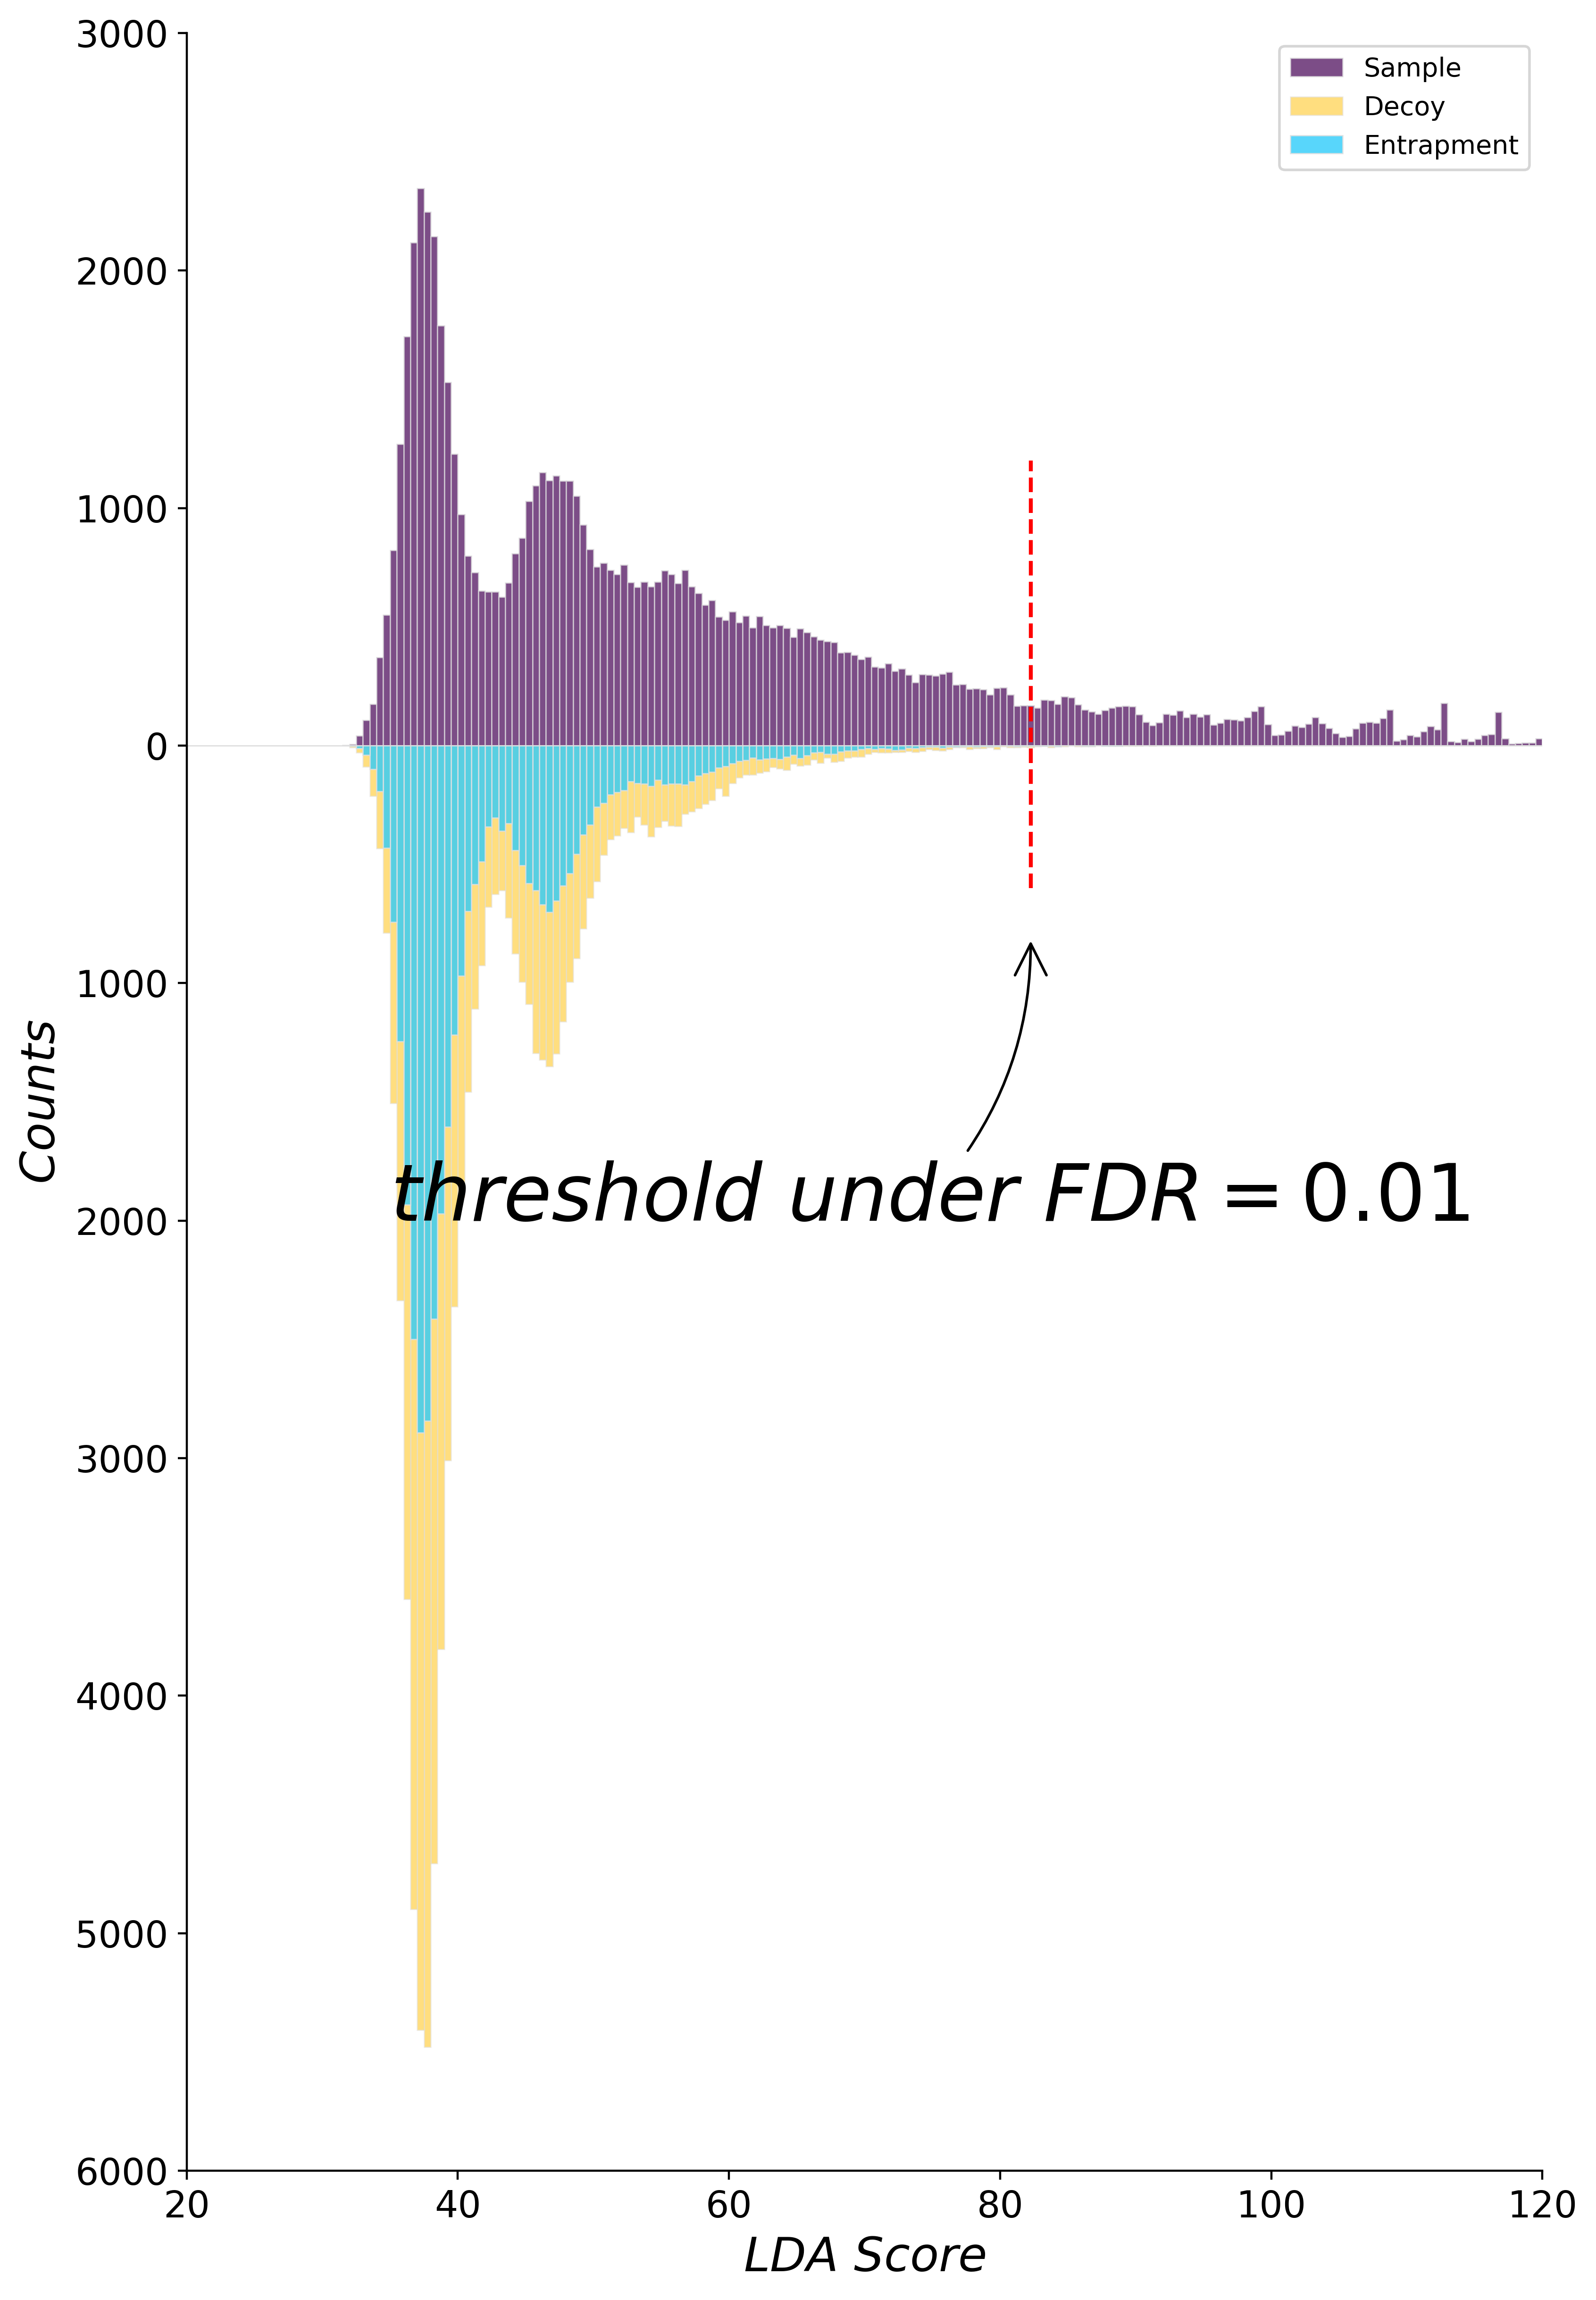

In [12]:
ref_bins = np.linspace(20,140,241)

fig, ax = plt.subplots(figsize=(15*0.618,15),dpi=400)
n, bins, patches = ax.hist(sample_score, bins=ref_bins, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7,label='Sample')
n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[-1]/max(n)))

new_bins = ref_bins*-1
new_bins = new_bins[::-1]
# get positions and heights of bars
heights, bins = np.histogram(decoy_score*-1, bins=new_bins) 
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1
# plot
ax.bar(bin_pos, heights, width=bin_width,facecolor='#FFBF00', edgecolor='#e0e0e0',linewidth=0.5, alpha=0.5,label='Decoy')


# get positions and heights of bars
heights, bins = np.histogram(trap_score*-1, bins=new_bins) 
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1
# plot
ax.bar(bin_pos, heights, width=bin_width,facecolor='#2ECCFA', edgecolor='#e0e0e0',linewidth=0.5, alpha=0.8,label='Entrapment')

ax.axvline(x=threshold,ymin=0.6,ymax=0.8,ls="--",c="red")
ax.annotate("$threshold\ under\ FDR=0.01$",xy=(threshold,-800),xycoords='data',xytext=(35,-2000),\
            fontsize=30,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))

ax.set_xlim(20,120)
# ax.set_ylim(-20000,5500)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("$Counts$",fontsize=18)
# ax.set_title("$Sample$")
ax.set_xlabel("$LDA\ Score$",fontsize=18)
ax.tick_params(labelsize=14)
# ax.set_facecolor("#E6F8E0")
plt.legend()
plt.yticks([-6000,-5000,-4000,-3000,-2000,-1000,0,1000,2000,3000],[6000,5000,4000,3000,2000,1000,0,1000,2000,3000])
# show the graph
# plt.show()
plt.savefig('supplement3.jpg')

In [13]:
bins = np.linspace(20,140,61)

In [14]:
bins

array([ 20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,
        42.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,
        64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,
        86.,  88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106.,
       108., 110., 112., 114., 116., 118., 120., 122., 124., 126., 128.,
       130., 132., 134., 136., 138., 140.])